We are gonna predict whether the image is mucca or pecora.

## Loading the datasets.

In [ ]:
# cloning the Datasets repository
!git clone https://github.com/dphi-official/Datasets.git

# copying the contents of the animal data folder to Google Drive
!cp -r Datasets/animal_data /content/animal_data/

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [ ]:
# unzipping the contents of train data
!unzip animal_data/train_beg.zip

Archive:  animal_data/train_beg.zip
replace train_beg/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# unzipping the contents of test data
!unzip animal_data/test_beg.zip

Archive:  animal_data/test_beg.zip
replace test_beg/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# accessing the given csv file
import pandas as pd
labels_csv = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv')
labels_csv.head()   # this file contains file name and corresponding labels

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


In [ ]:
image_paths = [[fname, '/content/train_beg/' + fname[:-4] + '.jpg'] for fname in labels_csv['filename']]
image_paths   

[['Image_1.jpg', '/content/train_beg/Image_1.jpg'],
 ['Image_2.jpg', '/content/train_beg/Image_2.jpg'],
 ['Image_3.jpg', '/content/train_beg/Image_3.jpg'],
 ['Image_4.jpg', '/content/train_beg/Image_4.jpg'],
 ['Image_5.jpg', '/content/train_beg/Image_5.jpg'],
 ['Image_6.jpg', '/content/train_beg/Image_6.jpg'],
 ['Image_7.jpg', '/content/train_beg/Image_7.jpg'],
 ['Image_8.jpg', '/content/train_beg/Image_8.jpg'],
 ['Image_9.jpg', '/content/train_beg/Image_9.jpg'],
 ['Image_10.jpg', '/content/train_beg/Image_10.jpg'],
 ['Image_11.jpg', '/content/train_beg/Image_11.jpg'],
 ['Image_12.jpg', '/content/train_beg/Image_12.jpg'],
 ['Image_13.jpg', '/content/train_beg/Image_13.jpg'],
 ['Image_14.jpg', '/content/train_beg/Image_14.jpg'],
 ['Image_15.jpg', '/content/train_beg/Image_15.jpg'],
 ['Image_16.jpg', '/content/train_beg/Image_16.jpg'],
 ['Image_17.jpg', '/content/train_beg/Image_17.jpg'],
 ['Image_18.jpg', '/content/train_beg/Image_18.jpg'],
 ['Image_19.jpg', '/content/train_beg/Image_19

In [ ]:
images = pd.DataFrame(image_paths)
images.columns = ['filename', 'file']
images

,filename,file
0,Image_1.jpg,/content/train_beg/Image_1.jpg
1,Image_2.jpg,/content/train_beg/Image_2.jpg
2,Image_3.jpg,/content/train_beg/Image_3.jpg
3,Image_4.jpg,/content/train_beg/Image_4.jpg
4,Image_5.jpg,/content/train_beg/Image_5.jpg
...,...,...
1195,Image_1196.jpg,/content/train_beg/Image_1196.jpg
1196,Image_1197.jpg,/content/train_beg/Image_1197.jpg
1197,Image_1198.jpg,/content/train_beg/Image_1198.jpg
1198,Image_1199.jpg,/content/train_beg/Image_1199.jpg


In [ ]:
train_data = pd.merge(images, labels_csv, how = 'inner', on = 'filename')
train_data

,filename,file,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca
...,...,...,...
1195,Image_1196.jpg,/content/train_beg/Image_1196.jpg,pecora
1196,Image_1197.jpg,/content/train_beg/Image_1197.jpg,pecora
1197,Image_1198.jpg,/content/train_beg/Image_1198.jpg,pecora
1198,Image_1199.jpg,/content/train_beg/Image_1199.jpg,pecora


In [ ]:
# Confirm if number of filepaths (i.e. images) is same as number of labels given
if len(labels_csv) == len(image_paths):
    print('Number of labels i.e. ', len(labels_csv), 'matches the number of filepaths i.e. ', len(image_paths))
else:
    print('Number of labels does not match the number of filepaths')

Number of labels i.e.  1200 matches the number of filepaths i.e.  1200


In [ ]:
print(train_data.iloc[578])

filename                          Image_579.jpg
file           /content/train_beg/Image_579.jpg
animal_type                               mucca
Name: 578, dtype: object


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

2.3.0


In [ ]:
import cv2

In [ ]:
data = []    
labels = []   
size=224
for i in range(len(train_data)):
  image_arr = cv2.imread(train_data['file'][i])     # for each i starting from 0, convert the ith image to array of pixels
  data.append(image_arr)
  # We also need to convert the categorical values i.e. 'mucca' and 'pecora' to numerical
  # Using conditional statement, we can do it here only. if mucca then 0, if pecora then 1
  if train_data['animal_type'][i] == 'mucca':           # if respective image's label is mucca
    labels.append(0)
  else:               # since there are only two type of animals, if the animal is not mucca, it will be pecora
    labels.append(1)      # This indexing needs to be remembered 'mucca' = 0 and 'pecora' = 1, this will be required when you convert your predictions on test data to categorical value again


In [ ]:
data

[array([[[207, 205, 205],
         [207, 205, 205],
         [207, 205, 205],
         ...,
         [204, 203, 205],
         [204, 203, 205],
         [205, 204, 206]],
 
        [[205, 203, 203],
         [205, 203, 203],
         [206, 204, 204],
         ...,
         [203, 202, 204],
         [205, 204, 206],
         [206, 205, 207]],
 
        [[207, 205, 205],
         [206, 204, 204],
         [205, 203, 203],
         ...,
         [204, 203, 205],
         [206, 205, 207],
         [208, 207, 209]],
 
        ...,
 
        [[246, 252, 247],
         [245, 255, 251],
         [232, 253, 250],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[241, 248, 243],
         [241, 255, 249],
         [230, 253, 249],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[243, 250, 245],
         [243, 255, 251],
         [232, 255, 251],
         ...,
         [254, 254, 254],
  

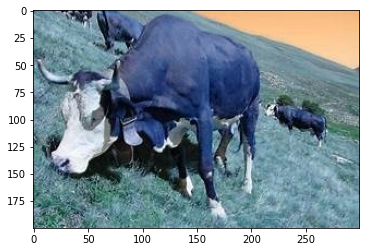

In [ ]:
plt.imshow(data[255])

In [ ]:
# we can use y_train to cross check
labels[255]

0

In [ ]:

data=np.asarray(data).astype(np.float32)

labels=np.asarray(labels).astype(np.float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(960, 200, 300, 3)

In [ ]:
X_test.shape

(240, 200, 300, 3)

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 200*300*3)    # converting our 2D array representin an image to one dimensional
X_test_flattened = X_test.reshape(len(X_test), 200*300*3)

In [ ]:
X_train_flattened.shape

(960, 180000)

In [ ]:
X_test_flattened.shape


(240, 180000)

In [ ]:
# Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, input_shape=(180000,), activation='relu'),
    tf.keras.layers.Dense(512, input_shape=(1000,),activation='relu'),
    tf.keras.layers.Dense(64, input_shape=(100,),activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              184321024 
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 184,878,721
Trainable params: 184,878,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from datetime import datetime
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_flattened, y_train,validation_data=(X_test_flattened,y_test) ,callbacks = [tensorboard_callback, es],
 epochs=10,verbose=1)

Epoch 1/10
 1/30 [>.............................] - ETA: 0s - loss: 63.0509 - accuracy: 0.5625WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
30/30 [==============================] - 31s 1s/step - loss: 407.5690 - accuracy: 0.4927 - val_loss: 184.2734 - val_accuracy: 0.5083
Epoch 2/10
30/30 [==============================] - 30s 1s/step - loss: 36.5064 - accuracy: 0.6083 - val_loss: 11.3269 - val_accuracy: 0.6250
Epoch 3/10
30/30 [==============================] - 30s 1s/step - loss: 42.3869 - accuracy: 0.5698 - val_loss: 11.4302 - val_accuracy: 0.6375
Epoch 4/10
30/30 [==============================] - 30s 1s/step - loss: 22.5629 - accuracy: 0.6333 - val_loss: 36.5476 - val_accuracy: 0.5042
Epoch 5/10
30/30 [==============================] - 30s 1s/step - los

In [ ]:
model.evaluate(X_test_flattened, y_test)

8/8 [==============================] - 4s 462ms/step - loss: 19.5257 - accuracy: 0.6708


[19.525745391845703, 0.6708333492279053]

In [ ]:
Testing_set_animals = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Testing_set_animals.csv",header=None)

In [ ]:
Testing_set_animals.head()

,0
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [ ]:
Testing_set_animals.columns=['filename']

In [ ]:
image_paths_ts = [[fname, '/content/test_beg/' + fname[:-4] + '.jpg'] for fname in Testing_set_animals['filename']]
image_paths_ts   

[['Image_1.jpg', '/content/test_beg/Image_1.jpg'],
 ['Image_2.jpg', '/content/test_beg/Image_2.jpg'],
 ['Image_3.jpg', '/content/test_beg/Image_3.jpg'],
 ['Image_4.jpg', '/content/test_beg/Image_4.jpg'],
 ['Image_5.jpg', '/content/test_beg/Image_5.jpg'],
 ['Image_6.jpg', '/content/test_beg/Image_6.jpg'],
 ['Image_7.jpg', '/content/test_beg/Image_7.jpg'],
 ['Image_8.jpg', '/content/test_beg/Image_8.jpg'],
 ['Image_9.jpg', '/content/test_beg/Image_9.jpg'],
 ['Image_10.jpg', '/content/test_beg/Image_10.jpg'],
 ['Image_11.jpg', '/content/test_beg/Image_11.jpg'],
 ['Image_12.jpg', '/content/test_beg/Image_12.jpg'],
 ['Image_13.jpg', '/content/test_beg/Image_13.jpg'],
 ['Image_14.jpg', '/content/test_beg/Image_14.jpg'],
 ['Image_15.jpg', '/content/test_beg/Image_15.jpg'],
 ['Image_16.jpg', '/content/test_beg/Image_16.jpg'],
 ['Image_17.jpg', '/content/test_beg/Image_17.jpg'],
 ['Image_18.jpg', '/content/test_beg/Image_18.jpg'],
 ['Image_19.jpg', '/content/test_beg/Image_19.jpg'],
 ['Image_20

In [ ]:
images_ts = pd.DataFrame(image_paths_ts)
images_ts.columns = ['filename', 'file']
images_ts

,filename,file
0,Image_1.jpg,/content/test_beg/Image_1.jpg
1,Image_2.jpg,/content/test_beg/Image_2.jpg
2,Image_3.jpg,/content/test_beg/Image_3.jpg
3,Image_4.jpg,/content/test_beg/Image_4.jpg
4,Image_5.jpg,/content/test_beg/Image_5.jpg
...,...,...
395,Image_396.jpg,/content/test_beg/Image_396.jpg
396,Image_397.jpg,/content/test_beg/Image_397.jpg
397,Image_398.jpg,/content/test_beg/Image_398.jpg
398,Image_399.jpg,/content/test_beg/Image_399.jpg


In [ ]:
data_ts = []    # initialize a list to store, each image's pixel values   
size=224
for i in range(len(images_ts)):
  image_arr = cv2.imread(images_ts['file'][i])     # for each i starting from 0, convert the ith image to array of pixels
  data_ts.append(image_arr)
        

In [ ]:
data_ts

[array([[[ 64,  80,  69],
         [ 58,  72,  61],
         [ 66,  77,  69],
         ...,
         [ 37,  62,  88],
         [ 55,  79, 107],
         [ 64,  88, 116]],
 
        [[ 53,  64,  54],
         [ 83,  92,  82],
         [ 72,  79,  72],
         ...,
         [ 78, 108, 133],
         [107, 136, 163],
         [121, 151, 178]],
 
        [[110, 111, 101],
         [ 99, 100,  90],
         [100, 101,  92],
         ...,
         [109, 149, 174],
         [118, 158, 183],
         [113, 154, 179]],
 
        ...,
 
        [[119, 146, 160],
         [115, 144, 158],
         [113, 140, 154],
         ...,
         [ 44,  62,  61],
         [ 36,  57,  58],
         [ 31,  53,  51]],
 
        [[119, 141, 153],
         [110, 134, 146],
         [102, 123, 138],
         ...,
         [ 29,  46,  43],
         [ 27,  45,  44],
         [ 27,  48,  45]],
 
        [[ 95, 114, 127],
         [ 89, 108, 121],
         [ 80,  99, 114],
         ...,
         [ 30,  47,  44],
  

In [ ]:
data_ts=np.asarray(data_ts).astype(np.float32)

In [ ]:

test_flattened = data_ts.reshape(len(data_ts), 200*300*3)

In [ ]:
pre=model.predict(test_flattened)

In [ ]:
pre=np.asarray(pre).astype(np.int8)

In [ ]:
pre

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [ ]:
res=[]
for i in range(len(pre)):
  if(pre[i]==0):
    res.append('mucca')
  else:
    res.append('pecora')

In [ ]:
res = pd.DataFrame(res)
res.index = Testing_set_animals.index # its important for comparison
res.columns = ["res"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_HP.csv')         
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>